In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import pickle
import matplotlib.pyplot as pyplot
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Pré - processamento dos Dados:

Lendo os dados de treino e teste.

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


Selecionando as features dos dados de teste e adicionando a de notas de matemática.

In [5]:
columns = list(df_test.columns)
columns.append('NU_NOTA_MT')

Selecionando só as features dos dados de teste para os de treino.

In [6]:
df_train = df_train[columns]
df_train

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,580.0,A,A,B,A,A,A,NaN,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,NaN,D,D,C,A,A,A,NaN,A,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,NaN,H,E,E,C,B,C,F,D,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,NaN,E,D,C,A,A,B,F,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,aadf671ef8c1c6efa42e69432093ab83c17a52ac,35,SP,20,M,1,1,1,3,1,...,440.0,E,E,G,B,B,B,C,A,403.2
13726,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,26,PE,33,F,3,2,1,10,1,...,560.0,A,A,C,A,B,B,I,A,452.4
13727,5354503700ecf2388f68990435390b6e1ad454ee,43,RS,15,F,1,1,3,0,1,...,600.0,C,G,B,A,B,A,NaN,A,398.0
13728,c7a9e94a42bd76b7978f13c013a61702e36cc42c,33,RJ,36,M,3,1,4,0,1,...,460.0,B,D,G,B,B,C,E,A,386.6


Vendo a correlação dos dados de treino e criando um novo dataframe com esses dados da correlação.

In [7]:
dados_corr = df_train.corr() 
dados_corr

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,...,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT
CO_UF_RESIDENCIA,1.000000,-0.002017,-0.234786,0.009433,0.025822,-0.032538,0.041406,0.018145,-0.034944,0.079229,...,0.128479,-0.096473,-0.016955,0.069195,0.047746,0.050400,0.061881,0.043565,0.060629,0.107493
NU_IDADE,-0.002017,1.000000,0.009675,-0.017713,-0.253403,0.681435,-0.296328,0.516253,-0.295091,-0.082980,...,-0.024979,0.082065,0.055675,-0.102243,-0.114181,-0.104293,-0.110452,-0.086709,-0.116125,-0.061485
TP_COR_RACA,-0.234786,0.009675,1.000000,0.015761,0.000738,0.003942,-0.041713,0.040504,0.009676,-0.172229,...,-0.168624,0.116860,0.020586,-0.097606,-0.090291,-0.096344,-0.102936,-0.091136,-0.107840,-0.157364
TP_NACIONALIDADE,0.009433,-0.017713,0.015761,1.000000,-0.000054,-0.026154,0.024070,0.020522,-0.015179,-0.012981,...,-0.049631,0.015266,0.005211,-0.031126,-0.030800,-0.027184,-0.031422,-0.025561,-0.032759,-0.034965
TP_ST_CONCLUSAO,0.025822,-0.253403,0.000738,-0.000054,1.000000,-0.592834,0.156222,NaN,0.533983,NaN,...,-0.117616,-0.025174,0.037078,-0.105647,-0.110186,-0.114245,-0.117711,-0.089861,-0.120580,-0.087869
TP_ANO_CONCLUIU,-0.032538,0.681435,0.003942,-0.026154,-0.592834,1.000000,-0.422308,NaN,-0.257710,NaN,...,0.077917,0.061881,0.005578,0.027881,0.006023,0.011259,0.022018,0.003954,0.015097,0.029039
TP_ESCOLA,0.041406,-0.296328,-0.041713,0.024070,0.156222,-0.422308,1.000000,-0.047195,-0.244562,0.975328,...,0.037254,-0.070008,-0.026380,0.059108,0.084441,0.079996,0.068909,0.071172,0.082520,0.069304
TP_ENSINO,0.018145,0.516253,0.040504,0.020522,NaN,NaN,-0.047195,1.000000,NaN,-0.037207,...,-0.092792,0.018257,0.040453,-0.088155,-0.115773,-0.107252,-0.114830,-0.103573,-0.119816,-0.086353
IN_TREINEIRO,-0.034944,-0.295091,0.009676,-0.015179,0.533983,-0.257710,-0.244562,NaN,1.000000,NaN,...,-0.028261,-0.036395,0.006688,-0.008709,-0.023308,-0.030147,-0.025958,-0.025811,-0.026328,-0.022287
TP_DEPENDENCIA_ADM_ESC,0.079229,-0.082980,-0.172229,-0.012981,NaN,NaN,0.975328,-0.037207,NaN,1.000000,...,0.299387,-0.165051,-0.049705,0.233368,0.282586,0.282997,0.264291,0.252388,0.297040,0.373233


Selecionando as features com maiores correlações em relação à nota de matemática.

In [8]:
dados_corr['NU_NOTA_MT'] > 0.4

CO_UF_RESIDENCIA          False
NU_IDADE                  False
TP_COR_RACA               False
TP_NACIONALIDADE          False
TP_ST_CONCLUSAO           False
TP_ANO_CONCLUIU           False
TP_ESCOLA                 False
TP_ENSINO                 False
IN_TREINEIRO              False
TP_DEPENDENCIA_ADM_ESC    False
IN_BAIXA_VISAO            False
IN_CEGUEIRA               False
IN_SURDEZ                 False
IN_DISLEXIA               False
IN_DISCALCULIA            False
IN_SABATISTA              False
IN_GESTANTE               False
IN_IDOSO                  False
TP_PRESENCA_CN            False
TP_PRESENCA_CH            False
TP_PRESENCA_LC            False
NU_NOTA_CN                 True
NU_NOTA_CH                 True
NU_NOTA_LC                 True
TP_LINGUA                 False
TP_STATUS_REDACAO         False
NU_NOTA_COMP1             False
NU_NOTA_COMP2             False
NU_NOTA_COMP3             False
NU_NOTA_COMP4             False
NU_NOTA_COMP5             False
NU_NOTA_

Passando as features que retornaram True aos dados de treino e teste que serão usados.

In [9]:
x_train = df_train[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']]
y_train = df_train[['NU_NOTA_MT']]
x_test = df_test[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']]

Obtendo informação dos tipos dos dados que serão usados.

In [10]:
print('Informações de x_train:')
print(x_train.info(), '\n')
print('Informações de y_train:')
print(y_train.info(), '\n')
print('Informações de z_train:')
print(x_test.info())

Informações de x_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NU_NOTA_CN  10341 non-null  float64
 1   NU_NOTA_CH  10341 non-null  float64
 2   NU_NOTA_LC  10133 non-null  float64
dtypes: float64(3)
memory usage: 321.9 KB
None 

Informações de y_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NU_NOTA_MT  10133 non-null  float64
dtypes: float64(1)
memory usage: 107.4 KB
None 

Informações de z_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NU_NOTA_CN  3442 non-null   float64
 1   NU_NOTA_CH  3442 non-null   float64
 2   NU_NOTA_LC 

Contando a quantidade de 0 nos dados.

In [11]:
print('Números de 0 em x_train:')
print((x_train == 0).sum(), '\n')
print('Números de 0 em y_train:')
print((y_train == 0).sum(), '\n')
print('Números de 0 em x_test:')
print((x_test == 0).sum())

Números de 0 em x_train:
NU_NOTA_CN    7
NU_NOTA_CH    3
NU_NOTA_LC    7
dtype: int64 

Números de 0 em y_train:
NU_NOTA_MT    10
dtype: int64 

Números de 0 em x_test:
NU_NOTA_CN    2
NU_NOTA_CH    1
NU_NOTA_LC    2
dtype: int64


Contando o número de valores nulos.

In [12]:
print('Número de valores nulos em x_train: ')
print(x_train.isnull().sum(), '\n')
print('Número de valores nulos em y_train: ')
print(y_train.isnull().sum(), '\n')
print('Número de valores nulos em x_test: ')
print(x_test.isnull().sum())

Número de valores nulos em x_train: 
NU_NOTA_CN    3389
NU_NOTA_CH    3389
NU_NOTA_LC    3597
dtype: int64 

Número de valores nulos em y_train: 
NU_NOTA_MT    3597
dtype: int64 

Número de valores nulos em x_test: 
NU_NOTA_CN    1134
NU_NOTA_CH    1134
NU_NOTA_LC    1199
dtype: int64


Trocando os NAN por 0 e checando.

In [13]:
x_train = x_train.replace(np.NAN, 0)
print('Número de 0 em x_train: ')
print((x_train == 0).sum(), '\n')
print('Número de 0 em y_train: ')
y_train = y_train.replace(np.NAN,0)
print((y_train == 0).sum(),'\n')
print('Número de 0 em x_test: ')
x_test = x_test.replace(np.NAN,0)
print((x_test == 0).sum())

Número de 0 em x_train: 
NU_NOTA_CN    3396
NU_NOTA_CH    3392
NU_NOTA_LC    3604
dtype: int64 

Número de 0 em y_train: 
NU_NOTA_MT    3607
dtype: int64 

Número de 0 em x_test: 
NU_NOTA_CN    1136
NU_NOTA_CH    1135
NU_NOTA_LC    1201
dtype: int64


In [14]:
x_train

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC
0,436.3,495.4,581.2
1,474.5,544.1,599.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
13725,438.2,419.7,394.5
13726,423.8,557.9,533.0
13727,460.5,528.9,569.3
13728,422.5,621.7,569.0


# Regressão Linear:

Aplicando o modelo de Regressão Linear aos dados de treino para prever a nota de matemática nos dados de teste.

In [15]:
clf = LinearRegression()

In [16]:
clf.fit(x_train, y_train)

LinearRegression()

In [17]:
pred_notas = clf.predict(x_test)
pred_notas

array([[426.47235456],
       [479.61591669],
       [585.50691156],
       ...,
       [592.1988508 ],
       [489.33697032],
       [ -3.81661537]])

Gerando o dataframe de resposta.

In [18]:
df_resposta = pd.DataFrame()
df_resposta['NU_INSCRICAO'] = df_test['NU_INSCRICAO']
df_resposta

,NU_INSCRICAO
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2,b38a03232f43b11c9d0788abaf060f7366053b6d
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d
4,715494628a50142ce8cb17191cfe6d0f3cae0934
...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef
4573,655fa6306720ff16e825903b5422a46608a77545
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293


In [19]:
df_resposta['NU_NOTA_MT'] = np.around(pred_notas,2)

In [20]:
df_resposta

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,426.47
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,479.62
2,b38a03232f43b11c9d0788abaf060f7366053b6d,585.51
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,-3.82
4,715494628a50142ce8cb17191cfe6d0f3cae0934,568.28
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,448.12
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,426.61
4573,655fa6306720ff16e825903b5422a46608a77545,592.20
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,489.34


Trocando os valores negativos por 0.

In [21]:
df_resposta['NU_NOTA_MT'][df_resposta['NU_NOTA_MT'] < 0] = 0

<ipython-input-21-1cab88b56e64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resposta['NU_NOTA_MT'][df_resposta['NU_NOTA_MT'] < 0] = 0


Visualização do histograma dos dados.

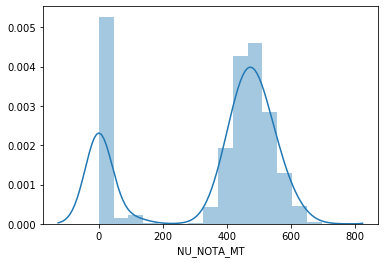

In [22]:
sns.distplot(df_resposta['NU_NOTA_MT']);

Salvando o dataframe.

In [23]:
df_resposta.to_csv('answer.csv', index=False, header=True)